['C', 'A', 'E']
142
['A', 'C', 'E']


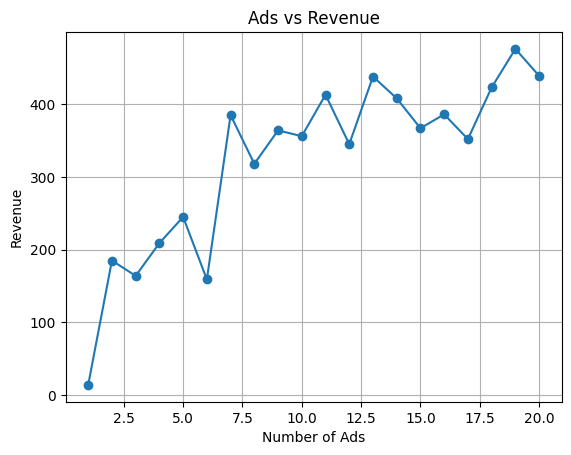

3


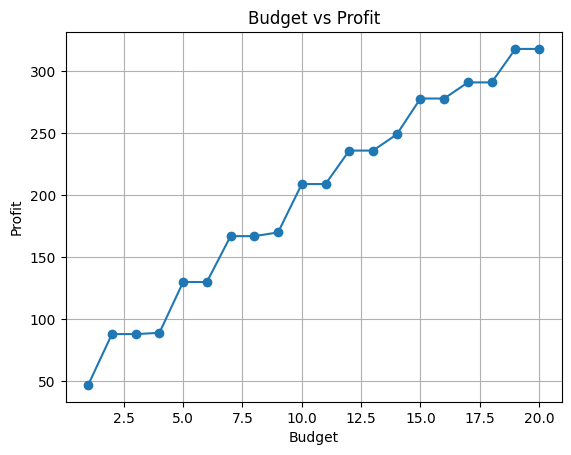

[3, 1, 6, 5, 7, 8, 4, 9, 2]
[5, 2, 9, 1, 3, 4, 7, 6, 8]
[4, 8, 7, 6, 2, 9, 5, 3, 1]
[2, 6, 3, 4, 1, 5, 9, 8, 7]
[9, 7, 4, 8, 6, 3, 1, 2, 5]
[8, 5, 1, 7, 9, 2, 6, 4, 3]
[1, 3, 8, 9, 4, 7, 2, 5, 6]
[6, 9, 2, 3, 5, 1, 8, 7, 4]
[7, 4, 5, 2, 8, 6, 3, 1, 9]
abc
51
2.8133392333984375e-05


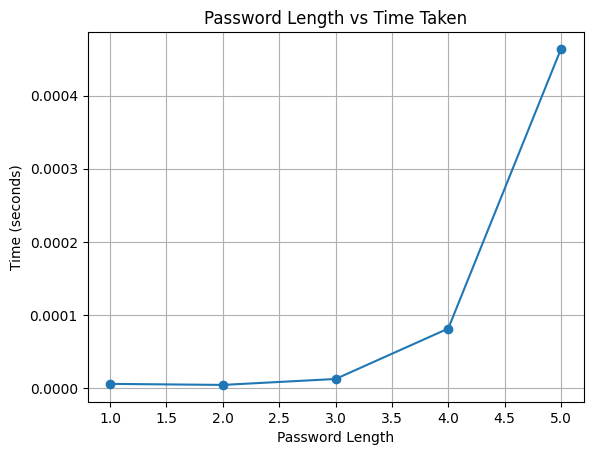

In [ ]:
#Problem 1
import matplotlib.pyplot as plt
import random

ads = [
    {'id': 'A', 'deadline': 2, 'profit': 100},
    {'id': 'B', 'deadline': 1, 'profit': 19},
    {'id': 'C', 'deadline': 2, 'profit': 27},
    {'id': 'D', 'deadline': 1, 'profit': 25},
    {'id': 'E', 'deadline': 3, 'profit': 15}
]

def schedule_ads(ads):
    ads.sort(key=lambda x: x['profit'], reverse=True)
    max_deadline = max(ad['deadline'] for ad in ads)
    slots = [None] * max_deadline
    total_profit = 0
    scheduled_ads = []
    for ad in ads:
        for slot in range(ad['deadline'] - 1, -1, -1):
            if slots[slot] is None:
                slots[slot] = ad['id']
                total_profit += ad['profit']
                scheduled_ads.append(ad)
                break
    return slots, total_profit, scheduled_ads

slots, total_profit, scheduled_ads = schedule_ads(ads)
print(slots)
print(total_profit)
print([ad['id'] for ad in scheduled_ads])

def simulate_ads_varying_size():
    revenues = []
    ad_counts = list(range(1, 21))
    for n in ad_counts:
        test_ads = []
        for i in range(n):
            test_ads.append({
                'id': f'Ad{i}',
                'deadline': random.randint(1, 5),
                'profit': random.randint(10, 100)
            })
        _, profit, _ = schedule_ads(test_ads)
        revenues.append(profit)
    return ad_counts, revenues

ad_counts, revenues = simulate_ads_varying_size()
plt.plot(ad_counts, revenues, marker='o')
plt.title("Ads vs Revenue")
plt.xlabel("Number of Ads")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

#PROBLEM 2
import matplotlib.pyplot as plt
import random

def knapsack(weights, profits, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], profits[i - 1] + dp[i - 1][w - weights[i - 1]])
            else:
                dp[i][w] = dp[i - 1][w]
    return dp[n][capacity]

weights = [4, 5, 1]
profits = [1, 2, 3]
capacity = 4

result = knapsack(weights, profits, capacity)
print(result)

def simulate_knapsack():
    weights = [random.randint(1, 10) for _ in range(10)]
    profits = [random.randint(10, 100) for _ in range(10)]
    budgets = list(range(1, 21))
    values = []
    for b in budgets:
        values.append(knapsack(weights, profits, b))
    return budgets, values

x, y = simulate_knapsack()
plt.plot(x, y, marker='o')
plt.title("Budget vs Profit")
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

#PROBLEM 3
def is_valid(grid, row, col, num):
    for i in range(9):
        if grid[row][i] == num or grid[i][col] == num:
            return False
    r, c = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if grid[r + i][c + j] == num:
                return False
    return True

def solve(grid):
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(grid, row, col, num):
                        grid[row][col] = num
                        if solve(grid):
                            return True
                        grid[row][col] = 0
                return False
    return True

grid = [
 [3,0,6,5,0,8,4,0,0],
 [5,2,0,0,0,0,0,0,0],
 [0,8,7,0,0,0,0,3,1],
 [0,0,3,0,1,0,0,8,0],
 [9,0,0,8,6,3,0,0,5],
 [0,5,0,0,9,0,6,0,0],
 [1,3,0,0,0,0,2,5,0],
 [0,0,0,0,0,0,0,7,4],
 [0,0,5,2,0,6,3,0,0]
]

solve(grid)
for row in grid:
    print(row)

#PROBLEM 4
import itertools
import time
import matplotlib.pyplot as plt

def crack_password(target, charset):
    attempts = 0
    start = time.time()
    for length in range(1, len(target) + 1):
        for guess in itertools.product(charset, repeat=length):
            attempts += 1
            if ''.join(guess) == target:
                end = time.time()
                return ''.join(guess), attempts, end - start
    return None, attempts, time.time() - start

password = "abc"
charset = "abc123"
found, attempts, duration = crack_password(password, charset)
print(found)
print(attempts)
print(duration)

def simulate_cracking():
    charset = "abc123"
    times = []
    lengths = list(range(1, 6))
    for l in lengths:
        password = charset[:l]
        _, _, t = crack_password(password, charset)
        times.append(t)
    return lengths, times

x, y = simulate_cracking()
plt.plot(x, y, marker='o')
plt.title("Password Length vs Time Taken")
plt.xlabel("Password Length")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

## Problem 1 (ad scheduling)

### Subtask:
Modify the `simulate_ads_varying_size` function to measure and return the execution time for each number of ads, then plot the ad count vs. time.


**Reasoning**:
The subtask requires modifying the existing `simulate_ads_varying_size` function to measure execution time and then plotting this against the number of ads. I will modify the function, call it, and generate the plot in a single code block.



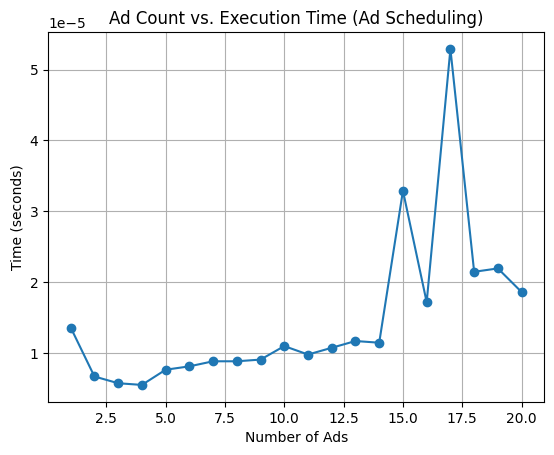

In [ ]:
import time

def simulate_ads_varying_size():
    times = []
    ad_counts = list(range(1, 21))
    for n in ad_counts:
        test_ads = []
        for i in range(n):
            test_ads.append({
                'id': f'Ad{i}',
                'deadline': random.randint(1, 5),
                'profit': random.randint(10, 100)
            })
        start_time = time.time()
        schedule_ads(test_ads)
        end_time = time.time()
        times.append(end_time - start_time)
    return ad_counts, times

ad_counts, times = simulate_ads_varying_size()
plt.figure()
plt.plot(ad_counts, times, marker='o')
plt.title("Ad Count vs. Execution Time (Ad Scheduling)")
plt.xlabel("Number of Ads")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

## Problem 2 (knapsack)

### Subtask:
Modify the `simulate_knapsack` function to measure and return the execution time for each budget size, then plot the budget vs. time.


**Reasoning**:
Import the time module and modify the simulate_knapsack function to measure and return the execution time for each budget size, then plot the budget vs. time.



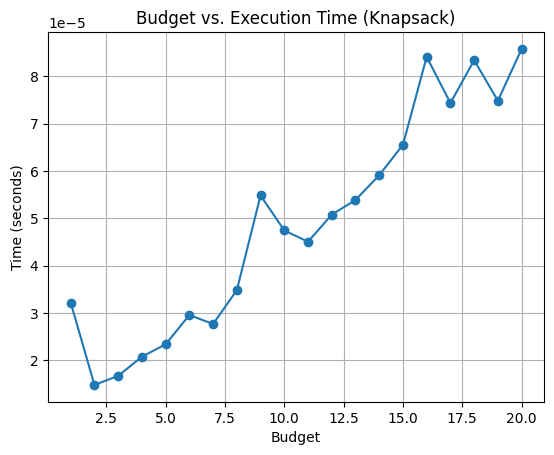

In [ ]:
import time

def simulate_knapsack():
    weights = [random.randint(1, 10) for _ in range(10)]
    profits = [random.randint(10, 100) for _ in range(10)]
    budgets = list(range(1, 21))
    times = []
    for b in budgets:
        start_time = time.time()
        knapsack(weights, profits, b)
        end_time = time.time()
        times.append(end_time - start_time)
    return budgets, times

budgets, times = simulate_knapsack()
plt.figure()
plt.plot(budgets, times, marker='o')
plt.title("Budget vs. Execution Time (Knapsack)")
plt.xlabel("Budget")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

## Problem 3 (sudoku solver)

### Subtask:
Create a new function to generate Sudoku grids of varying difficulty or size (if possible with the current structure) and measure the execution time to solve them, then plot the grid size/difficulty vs. time. If varying size is not feasible, we will need to explore alternative approaches to demonstrate time complexity.


**Reasoning**:
Define a function to simulate solving Sudoku grids with varying difficulty by controlling the number of pre-filled cells and measure the execution time for each.



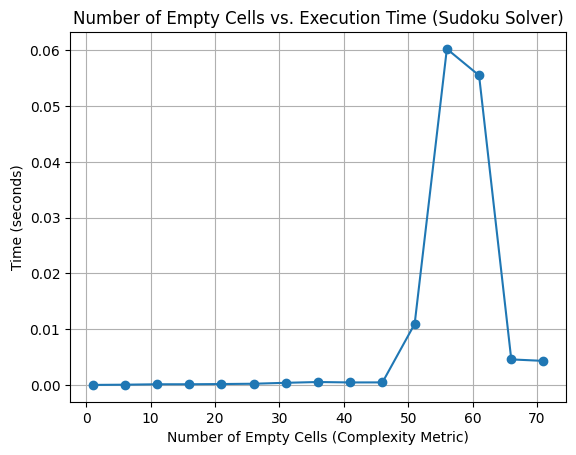

In [ ]:
import time
import random

def generate_sudoku_grid(filled_cells):
    # Create an empty 9x9 grid
    grid = [[0 for _ in range(9)] for _ in range(9)]
    # This is a very basic way to generate a grid with some filled cells
    # For a truly solvable Sudoku, a more sophisticated generator is needed.
    # We'll fill random cells for demonstration of time complexity with varying density.
    cells = [(r, c) for r in range(9) for c in range(9)]
    random.shuffle(cells)
    for r, c in cells[:filled_cells]:
        grid[r][c] = random.randint(1, 9) # This doesn't guarantee a solvable Sudoku

    # A more reliable approach would be to start with a solved grid and remove cells,
    # but for demonstrating time complexity with varying density, this might suffice
    # if we assume 'solve' can handle unsolvable grids gracefully (which it might not).
    # Let's stick to a known solvable grid and remove cells for a better test.

    base_grid = [
     [3,1,6,5,7,8,4,9,2],
     [5,2,9,1,3,4,7,6,8],
     [4,8,7,6,2,9,5,3,1],
     [2,6,3,4,1,5,9,8,7],
     [9,7,4,8,6,3,1,2,5],
     [8,5,1,7,9,2,6,4,3],
     [1,3,8,9,4,7,2,5,6],
     [6,9,2,3,5,1,8,7,4],
     [7,4,5,2,8,6,3,1,9]
    ]
    # Create a deep copy to avoid modifying the base grid
    grid = [row[:] for row in base_grid]

    empty_cells_count = 81 - filled_cells
    cells_to_empty = random.sample([(r, c) for r in range(9) for c in range(9)], empty_cells_count)
    for r, c in cells_to_empty:
        grid[r][c] = 0
    return grid

def simulate_sudoku_solving():
    times = []
    # Vary the number of filled cells to represent difficulty
    # More filled cells means less empty cells and potentially easier/faster to solve
    num_filled_cells = list(range(10, 81, 5)) # From 10 to 80 filled cells, in steps of 5
    complexities = [] # We can use the number of empty cells as a complexity metric

    for n_filled in num_filled_cells:
        grid = generate_sudoku_grid(n_filled)
        start_time = time.time()
        # Note: The solve function modifies the grid in-place.
        # If you need the original grid later, pass a copy.
        solve([row[:] for row in grid])
        end_time = time.time()
        times.append(end_time - start_time)
        complexities.append(81 - n_filled) # Number of empty cells

    return complexities, times

complexities, times = simulate_sudoku_solving()

plt.figure()
plt.plot(complexities, times, marker='o')
plt.title("Number of Empty Cells vs. Execution Time (Sudoku Solver)")
plt.xlabel("Number of Empty Cells (Complexity Metric)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

## Problem 4 (password cracking)

### Subtask:
Modify the `simulate_cracking` function to measure and return the execution time for each password length, then plot the password length vs. time.


**Reasoning**:
Modify the simulate_cracking function to measure and return the execution time for each password length, then plot the password length vs. time.



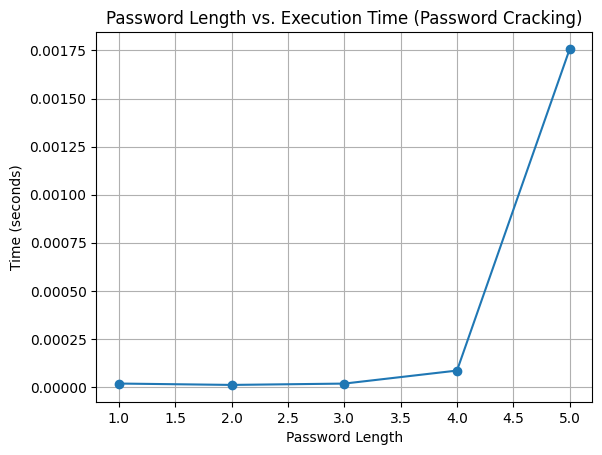

In [ ]:
import time

def crack_password(target, charset):
    attempts = 0
    start = time.time()
    for length in range(1, len(target) + 1):
        for guess in itertools.product(charset, repeat=length):
            attempts += 1
            if ''.join(guess) == target:
                end = time.time()
                return ''.join(guess), attempts, end - start
    return None, attempts, time.time() - start

def simulate_cracking():
    charset = "abc123"
    times = []
    lengths = list(range(1, 6))
    for l in lengths:
        password = charset[:l]
        start_time = time.time()
        crack_password(password, charset)
        end_time = time.time()
        times.append(end_time - start_time)
    return lengths, times

x, y = simulate_cracking()
plt.figure()
plt.plot(x, y, marker='o')
plt.title("Password Length vs. Execution Time (Password Cracking)")
plt.xlabel("Password Length")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()